In [164]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('data/avocado.csv')
df = df[["AveragePrice", "Total Volume", "region"]]
df.head()

,AveragePrice,Total Volume,region
0,1.33,64236.62,Albany
1,1.35,54876.98,Albany
2,0.93,118220.22,Albany
3,1.08,78992.15,Albany
4,1.28,51039.60,Albany


In [166]:
df = df.set_index("region")
df.head()

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60


In [167]:
cities = df.loc[["NewYork","LosAngeles"]]
cities = cities.reset_index()
#print(cities.groupby('region').size())
cities.head()
cities 

,region,AveragePrice,Total Volume
0,NewYork,1.17,1129876.05
1,NewYork,1.23,1139347.98
2,NewYork,1.12,1254805.29
3,NewYork,1.20,1068971.54
4,NewYork,1.16,999169.64
...,...,...,...
671,LosAngeles,1.60,100274.88
672,LosAngeles,1.73,97026.15
673,LosAngeles,1.75,94441.50
674,LosAngeles,1.68,106624.63


In [168]:
df_shuffled=sklearn.utils.shuffle(cities)
print(df_shuffled)

         region  AveragePrice  Total Volume
556  LosAngeles          1.29      43649.12
607  LosAngeles          1.06      79706.09
471  LosAngeles          0.99    3390850.94
344  LosAngeles          0.74    2828361.90
457  LosAngeles          1.73    1865690.48
..          ...           ...           ...
554  LosAngeles          1.12      50107.32
170     NewYork          1.93      24549.47
407  LosAngeles          0.81    3563268.97
602  LosAngeles          0.96     128489.58
571  LosAngeles          1.52      76112.99

[676 rows x 3 columns]


In [169]:
# cities['region'] = cities['region'].replace(['Houston'],1)
cities['region'] = cities['region'].replace(['LosAngeles'],0)
cities['region'] = cities['region'].replace(['NewYork'],1)
# cities['region'] = cities['region'].replace(['PhoenixTucson'],4)
# cities['region'] = cities['region'].replace(['SanFrancisco'],5)

In [174]:
cities["region"] = pd.to_numeric(cities["region"])
print(cities.groupby('region').size())

region
0    338
1    338
dtype: int64


In [175]:
cities
df

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60
...,...,...
WestTexNewMexico,1.63,17074.83
WestTexNewMexico,1.71,13888.04
WestTexNewMexico,1.87,13766.76


In [179]:
cities.tail()
cities = cities[["AveragePrice", "Total Volume", "region"]]
cities.head()
# average price, volumen

display(cities)

,AveragePrice,Total Volume,region
0,1.17,1129876.05,1
1,1.23,1139347.98,1
2,1.12,1254805.29,1
3,1.20,1068971.54,1
4,1.16,999169.64,1
...,...,...,...
671,1.60,100274.88,0
672,1.73,97026.15,0
673,1.75,94441.50,0
674,1.68,106624.63,0


In [180]:
dataset = cities.values
dataset

array([[1.17000000e+00, 1.12987605e+06, 1.00000000e+00],
       [1.23000000e+00, 1.13934798e+06, 1.00000000e+00],
       [1.12000000e+00, 1.25480529e+06, 1.00000000e+00],
       ...,
       [1.75000000e+00, 9.44415000e+04, 0.00000000e+00],
       [1.68000000e+00, 1.06624630e+05, 0.00000000e+00],
       [1.80000000e+00, 8.75172300e+04, 0.00000000e+00]])

In [181]:
X = dataset[:,0:2]
print(X)
Y = dataset[:,2]
print(Y)

[[1.17000000e+00 1.12987605e+06]
 [1.23000000e+00 1.13934798e+06]
 [1.12000000e+00 1.25480529e+06]
 ...
 [1.75000000e+00 9.44415000e+04]
 [1.68000000e+00 1.06624630e+05]
 [1.80000000e+00 8.75172300e+04]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [182]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [183]:
X_scale

array([[0.30188679, 0.20532361],
       [0.33018868, 0.20705783],
       [0.27830189, 0.22819695],
       ...,
       [0.5754717 , 0.01574553],
       [0.54245283, 0.01797615],
       [0.5990566 , 0.01447777]])

In [184]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [185]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [186]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(473, 2) (101, 2) (102, 2) (473,) (101,) (102,)


In [187]:
# building and training neural network

# setting up the architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='softmax'), # neurons
    Dense(32, activation='relu'), # neurons
    Dense(32, activation='softmax'),
    Dense(32, activation='relu'),
    Dense(1, activation='softmax'),
])

In [188]:
# configuring it for compiling
model.compile(optimizer='sgd',
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])

In [189]:
# training our model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=45,
          validation_data=(X_val, Y_val))

Train on 473 samples, validate on 101 samples
Epoch 1/45
473/473 [==============================] - 1s 3ms/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 2/45
473/473 [==============================] - 0s 148us/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 3/45
473/473 [==============================] - 0s 240us/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 4/45
473/473 [==============================] - 0s 224us/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 5/45
473/473 [==============================] - 0s 171us/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 6/45
473/473 [==============================] - 0s 197us/step - loss: -8.0761e-07 - accuracy: 0.4989 - val_loss: -8.4580e-07 - val_accuracy: 0.4752
Epoch 7/45
473/473 [============

In [190]:
model.evaluate(X_test, Y_test)[1] # viewing results

102/102 [==============================] - 0s 275us/step


0.529411792755127

In [191]:
print(hist.history)

{'val_loss': [-8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8.458010566161224e-07, -8

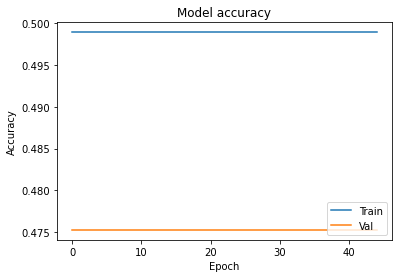

In [192]:
# graphing the accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [193]:
predictions = model.predict_classes(X)

In [194]:
for i in range(len(X)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[1.17, 1129876.05] => 1 (expected 1)
[1.23, 1139347.98] => 1 (expected 1)
[1.12, 1254805.29] => 1 (expected 1)
[1.2, 1068971.54] => 1 (expected 1)
[1.16, 999169.64] => 1 (expected 1)
[1.14, 1111803.12] => 1 (expected 1)
[1.04, 1357393.34] => 1 (expected 1)
[1.13, 1406262.16] => 1 (expected 1)
[1.06, 2180520.22] => 1 (expected 1)
[1.23, 1048045.86] => 1 (expected 1)
[0.97, 1856337.85] => 1 (expected 1)
[1.28, 1099283.22] => 1 (expected 1)
[1.26, 1342963.26] => 1 (expected 1)
[1.16, 1201066.41] => 1 (expected 1)
[1.18, 1192210.54] => 1 (expected 1)
[1.16, 1479334.84] => 1 (expected 1)
[1.22, 1340925.56] => 1 (expected 1)
[1.22, 1251081.11] => 1 (expected 1)
[1.1, 1477964.12] => 1 (expected 1)
[1.14, 1535981.4] => 1 (expected 1)
[1.1, 1563915.04] => 1 (expected 1)
[1.14, 1458722.6] => 1 (expected 1)
[1.28, 1211731.19] => 1 (expected 1)
[1.37, 1251919.24] => 1 (expected 1)
[1.27, 1338282.24] => 1 (expected 1)
[1.18, 1666825.63] => 1 (expected 1)
[1.36, 1284789.44] => 1 (expected 1)
[1.28, 

In [195]:
print(Y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [196]:
x = X[:1]
## Costo 1.25, total vendido 12000.64 seria Los Angeles
## Costo 
a = np.array([1.25, 12000.64])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [197]:
x = X[:1]
## Costo 1.16, total vendido 15000.82 seria Los Angeles
## Costo 
a = np.array([1.16, 15000.82])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [198]:
x = X[:1]
## Costo 1.89, total vendido 8000.53 seria Los Angeles
## Costo 
a = np.array([1.89, 18000.53])
dummy = a[np.newaxis, :]
predictions = model.predict_classes(dummy)
print(predictions)

[[1]]


In [199]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(len(X)):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[1.17, 1129876.05] => 0 (expected 1)
[1.23, 1139347.98] => 0 (expected 1)
[1.12, 1254805.29] => 0 (expected 1)
[1.2, 1068971.54] => 0 (expected 1)
[1.16, 999169.64] => 0 (expected 1)
[1.14, 1111803.12] => 0 (expected 1)
[1.04, 1357393.34] => 0 (expected 1)
[1.13, 1406262.16] => 0 (expected 1)
[1.06, 2180520.22] => 0 (expected 1)
[1.23, 1048045.86] => 0 (expected 1)
[0.97, 1856337.85] => 0 (expected 1)
[1.28, 1099283.22] => 0 (expected 1)
[1.26, 1342963.26] => 0 (expected 1)
[1.16, 1201066.41] => 0 (expected 1)
[1.18, 1192210.54] => 0 (expected 1)
[1.16, 1479334.84] => 0 (expected 1)
[1.22, 1340925.56] => 0 (expected 1)
[1.22, 1251081.11] => 0 (expected 1)
[1.1, 1477964.12] => 0 (expected 1)
[1.14, 1535981.4] => 0 (expected 1)
[1.1, 1563915.04] => 0 (expected 1)
[1.14, 1458722.6] => 0 (expected 1)
[1.28, 1211731.19] => 0 (expected 1)
[1.37, 1251919.24] => 0 (expected 1)
[1.27, 1338282.24] => 0 (expected 1)
[1.18, 1666825.63] => 0 (expected 1)
[1.36, 1284789.44] => 0 (expected 1)
[1.28, 

In [202]:
_, accuracy = model.evaluate(X, Y, verbose=0)
print(accuracy)

0.5591716170310974
